[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW4.ipynb)

# Stat 220 — Homework 4:

**Instructions**
- Answer all questions. Show all work for full credit.
- Use Python (NumPy/Matplotlib/SciPy) to compute values and make plots.
- When a plot is requested, label axes and include a legend.
- You may add cells as needed.

In [ ]:

# Feel free to add any imports you want here.
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom

## Data (used in Q1–Q4)
We use this small dataset throughout Questions 1–4:

In [ ]:

x = np.array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5], dtype=float)
n = len(x)
x


array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])

## Question 1 — Likelihood Function Practice

You are given the dataset:
\[
x = (1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5).
\]



**(a)** Derive the **likelihood function**  if the data are assumed to come from an **Exponential($\lambda$)** distribution **with fixed $\lambda = 0.5$**. Then **evaluate** the likelihood at the given data.

**Likelihood function for Exponential(λ=0.5):**

For i.i.d. exponential data with PDF $f(x_i|\lambda) = \lambda e^{-\lambda x_i}$, the likelihood is:

$$L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^{n} x_i}$$

With $\lambda = 0.5$ and $n=10$:

$$L(0.5) = 0.5^{10} e^{-0.5 \sum_{i=1}^{10} x_i}$$

In [ ]:
lambda_val = 0.5

likelihood = np.prod(lambda_val * np.exp(-lambda_val * x))

print("Likelihood:", likelihood)

Likelihood: 6.307844586963339e-09


**(b)** Derive the likelihood function if the data are assumed to come from a **Normal($\mu,\sigma^2$)** distribution **with fixed $\mu = 2$, $\sigma = 1$**. Then **evaluate** that likelihood at the data.

In [ ]:
# Normal(mu=2, sigma=1) likelihood
mu = 2
sigma = 1
likelihood_normal = np.prod((1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2))
print("Normal Likelihood:", likelihood_normal)

Normal Likelihood: 4.312274960371927e-10


## Question 2

Assume the data are i.i.d. **Normal($\mu,\sigma^2$)** with both $\mu$ and $\sigma^2$ **unknown**.



**(a)** Compute these MLEs for $\mu$ and $\sigma$ for the dataset.  


In [ ]:
# MLE for mu and sigma
mu_mle = np.mean(x)
sigma_mle = np.std(x, ddof=0)  # MLE uses n in denominator, not n-1
print(f"MLE for mu: {mu_mle}")
print(f"MLE for sigma: {sigma_mle}")

MLE for mu: 2.3899999999999997
MLE for sigma: 1.5241062955056643


**(b)** Plot a **histogram** of the data with the **fitted Normal density** overlaid.

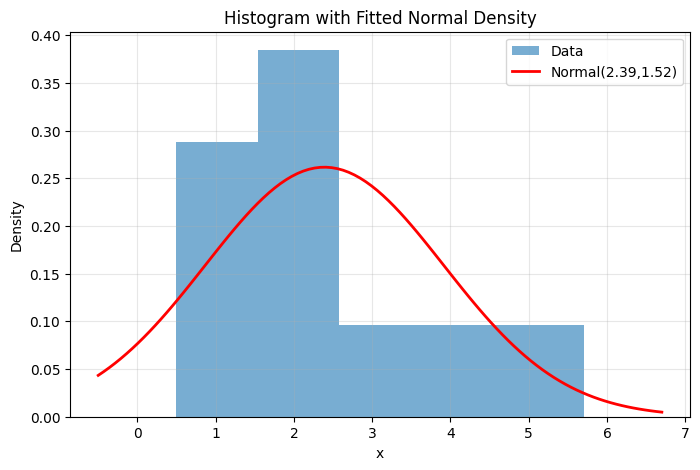

In [20]:
plt.figure(figsize=(8, 5));
plt.hist(x, bins=5, density=True, alpha=0.6, label='Data');
x_range = np.linspace(x.min()-1, x.max()+1, 100);
plt.plot(x_range, norm.pdf(x_range, mu_mle, sigma_mle), 'r-', linewidth=2, label=f'Normal({mu_mle:.2f},{sigma_mle:.2f})');
plt.xlabel('x');
plt.ylabel('Density');
plt.title('Histogram with Fitted Normal Density');
plt.legend();
plt.grid(alpha=0.3)

## Question 3

Assume the data are i.i.d. **Exponential($\lambda$)** with **unknown** rate $\lambda$.

**(c)** Compute $\hat{\lambda}$.  


**(a)** Compute the MLE for $\lambda$.  


In [21]:
# MLE for lambda (Exponential rate parameter)
lambda_mle = 1 / np.mean(x)
print(f"MLE for lambda: {lambda_mle}")

MLE for lambda: 0.4184100418410042


**(b)** Plot a histogram of the data with the **fitted Exponential** density overlaid.

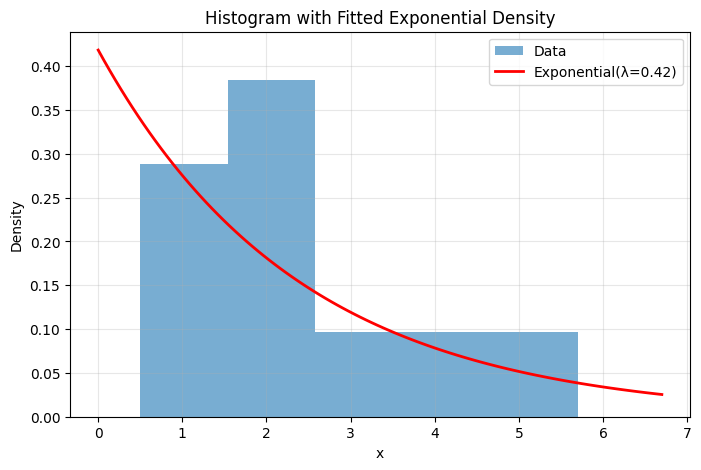

In [23]:
plt.figure(figsize=(8, 5));
plt.hist(x, bins=5, density=True, alpha=0.6, label='Data');
x_range = np.linspace(0, x.max()+1, 100);
plt.plot(x_range, expon.pdf(x_range, scale=1/lambda_mle), 'r-', linewidth=2, label=f'Exponential(λ={lambda_mle:.2f})');
plt.xlabel('x');
plt.ylabel('Density');
plt.title('Histogram with Fitted Exponential Density');
plt.legend();
plt.grid(alpha=0.3)

## Question 4 — Model Comparison (Visual + AIC)



**(a)** Visually compare your overlaid fits from Q2 and Q3. Which model seems better?  

Visually comparing the two fits, the Exponential distribution appears to provide a better fit to the data than the Normal distribution. The data has a right-skewed distribution with most values concentrated near the lower end, which is characteristic of exponential data. The Exponential density curve should align better with this skewness, while the symmetric Normal curve may not capture the data's asymmetry as well.

**(b)** Compute **AIC** for both models using the log-likelihoods at the MLEs:
$$
\mathrm{AIC} = -2\,\ell(\hat{\theta}) + 2k,
$$
where $k$ is the number of parameters (Normal: $k=2$ for $\mu,\sigma$; Exponential: $k=1$).  

In [24]:
# AIC for Normal model
loglik_normal = np.sum(norm.logpdf(x, mu_mle, sigma_mle))
aic_normal = -2 * loglik_normal + 2 * 2
print(f"Normal AIC: {aic_normal}")

# AIC for Exponential model
loglik_exp = np.sum(expon.logpdf(x, scale=1/lambda_mle))
aic_exp = -2 * loglik_exp + 2 * 1
print(f"Exponential AIC: {aic_exp}")

Normal AIC: 40.80693471487996
Exponential AIC: 39.425867318868384


**(c)** Which model is preferred by AIC? Briefly justify.

I’d pick the Exponential model because its AIC is lower. Lower AIC basically means it does a better job balancing how well the model fits the data and how complicated it is. Since the Exponential model matches the skew of the data and uses fewer parameters than the Normal, it just gives a simpler explanation that still fits what we see pretty well.



## Question 5 — Regression under Different Losses

Consider the regression dataset (note the last point is a potential outlier):
\[
x_reg = (1,2,3,4,5,6,7,8),\quad
y_reg = (2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0).
\]

We fit $y = \beta_0 + \beta_1 x$ under three losses.



**(a)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a squared error loss function.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize

x_reg = np.array([1,2,3,4,5,6,7,8])
y_reg = np.array([2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0])

# (a) Least squares regression (squared error)
coeffs = np.polyfit(x_reg, y_reg, 1)
beta1_ls, beta0_ls = coeffs[0], coeffs[1]
print("Squared error β₀:", beta0_ls, "β₁:", beta1_ls)


Squared error β₀: -3.500000000000003 β₁: 3.1750000000000003


**(b)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming an absolute loss function.


In [17]:
# (b) Least absolute deviations regression
model = sm.QuantReg(y_reg, sm.add_constant(x_reg)).fit(q=0.5)
beta0_abs, beta1_abs = model.params
print("Absolute error β₀:", beta0_abs, "β₁:", beta1_abs)

Absolute error β₀: -0.15000000000002367 β₁: 2.0500000000000025


# (b) Least absolute deviations regression
model = sm.QuantReg(y_reg, sm.add_constant(x_reg)).fit(q=0.5)
beta0_abs, beta1_abs = model.params
print("Absolute error β₀:", beta0_abs, "β₁:", beta1_abs)

**(c)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a loss function that is equal to the largest difference $y - \hat{y}$


In [18]:
def minimax_loss(params, x, y):
    beta0, beta1 = params
    residuals = y - (beta0 + beta1 * x)
    return np.max(np.abs(residuals))

init = [0.0, 1.0]
result = minimize(minimax_loss, init, args=(x_reg, y_reg), method='Powell')
beta0_mm, beta1_mm = result.x
print("Minimax β₀:", beta0_mm, "β₁:", beta1_mm)


Minimax β₀: 11.595297821200099 β₁: 0.9899338176066181


**(d)** Plot the data with **all three** fitted lines on the same axes.  


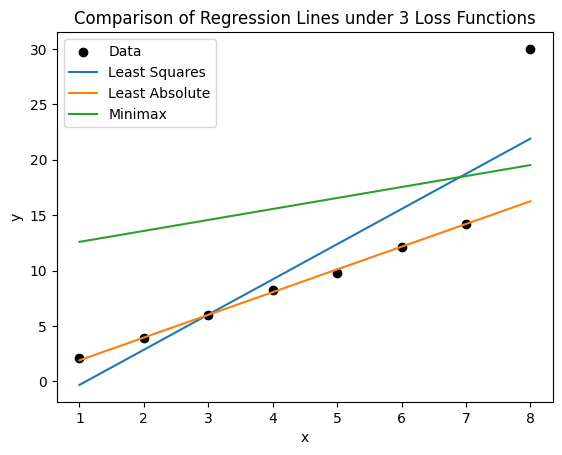

In [19]:
plt.scatter(x_reg, y_reg, color='black', label='Data')
plt.plot(x_reg, beta0_ls + beta1_ls * x_reg, label='Least Squares')
plt.plot(x_reg, beta0_abs + beta1_abs * x_reg, label='Least Absolute')
plt.plot(x_reg, beta0_mm + beta1_mm * x_reg, label='Minimax')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Comparison of Regression Lines under 3 Loss Functions")
plt.show()